In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/3_total_with_clusters.csv")
df = df.drop('Unnamed: 0', axis=1)
df_groups = df.groupby('house_cluster')

Cluster 0

In [ ]:
cluster0 = df_groups.get_group(1)
energy0 = cluster0.drop('house_cluster', axis=1)

In [ ]:
housecount0 = cluster0.groupby('day')[['LCLid']].nunique()
# housecount0.get_group('2012-11-07')
housecount0.head()

,LCLid
day,
2011-11-24,1
2011-11-25,1
2011-11-26,1
2011-11-27,1
2011-11-28,1


<Axes: xlabel='day'>

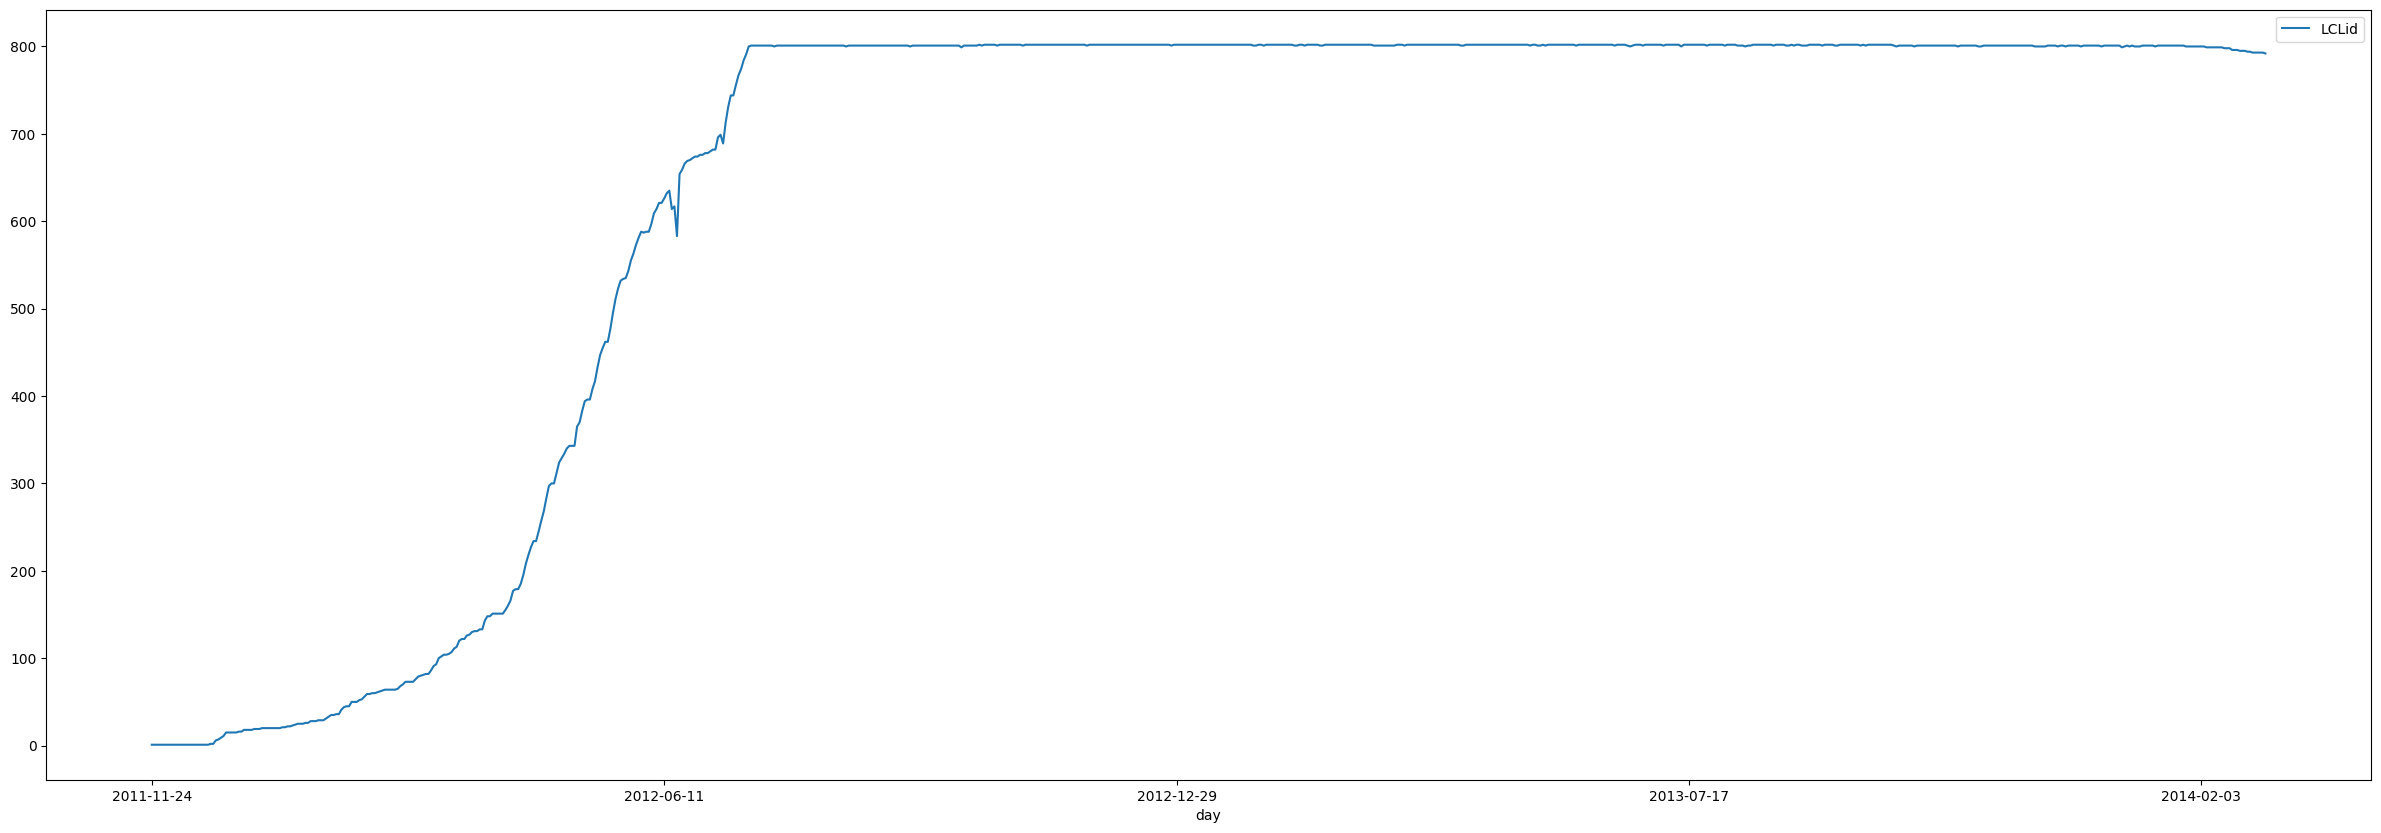

In [ ]:
housecount0.plot(figsize=(30,10))

In [ ]:
# [['LCLid', 'energy_sum', 'temperatureMax', 'windSpeed', 'humidity', 'holiday_ind']]
energy0 = cluster0.groupby('day')[['energy_sum', 'temperatureMax', 'windSpeed', 'humidity', 'holiday_ind']].sum()
energy0 = energy0.merge(housecount0, on=['day'])
energy0 = energy0.reset_index()
energy0.count()

day               826
energy_sum        826
temperatureMax    826
windSpeed         826
humidity          826
holiday_ind       826
LCLid             826
dtype: int64

In [ ]:
energy0['day'] = pd.to_datetime(energy0['day'],format='%Y-%m-%d').dt.date

In [ ]:
energy0['avg_energy'] =  energy0['energy_sum']/energy0['LCLid']
print("Starting Point of Data at Day Level",min(energy0['day']))
print("Ending Point of Data at Day Level",max(energy0['day']))

Starting Point of Data at Day Level 2011-11-24
Ending Point of Data at Day Level 2014-02-28


In [ ]:
energy0

,day,energy_sum,temperatureMax,windSpeed,humidity,holiday_ind,LCLid,avg_energy
0,2011-11-24,6.136000,12.93,4.04,0.89,0.0,1,6.136000
1,2011-11-25,18.945000,13.03,5.02,0.79,0.0,1,18.945000
2,2011-11-26,28.471000,12.96,5.75,0.81,1.0,1,28.471000
3,2011-11-27,24.710000,13.54,5.48,0.72,1.0,1,24.710000
4,2011-11-28,18.007000,12.58,2.34,0.86,0.0,1,18.007000
...,...,...,...,...,...,...,...,...
821,2014-02-24,11771.705001,11284.39,3980.86,586.82,0.0,793,14.844521
822,2014-02-25,11481.545005,9063.99,4512.17,618.54,0.0,793,14.478619
823,2014-02-26,11353.865998,8952.97,3029.26,578.89,0.0,793,14.317612
824,2014-02-27,11509.880000,8175.83,3283.02,586.82,0.0,793,14.514351


In [ ]:
energy0.describe()

,energy_sum,temperatureMax,windSpeed,humidity,holiday_ind,LCLid,avg_energy
count,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000
mean,9021.760008,9182.170847,2304.204189,499.739334,181.958838,640.509685,14.702695
std,4524.700213,6188.355692,1591.947438,236.979390,329.809831,289.232783,3.644075
min,6.136000,-48.120000,2.340000,0.680000,0.000000,1.000000,0.293433
25%,7715.931000,4059.687500,971.180000,456.142500,0.000000,655.250000,11.907374
50%,9718.209999,8760.400000,2362.950000,592.740000,0.000000,801.000000,14.318162
75%,12684.710500,13770.052500,3364.390000,665.660000,64.000000,802.000000,16.564956
max,27346.784006,25952.400000,7928.160000,1058.640000,1604.000000,802.000000,47.372000


In [ ]:
# Weather clusters
from sklearn.preprocessing import MinMaxScaler

scaler0 = MinMaxScaler()
weather_scaled0 = scaler0.fit_transform(energy0[['temperatureMax','humidity','windSpeed']])

In [ ]:
weather_scaled0

array([[2.34802996e-03, 1.98495217e-04, 2.14488848e-04],
       [2.35187604e-03, 1.03973685e-04, 3.38135360e-04],
       [2.34918379e-03, 1.22877992e-04, 4.30239395e-04],
       ...,
       [3.46188845e-01, 5.46532950e-01, 3.81906225e-01],
       [3.16299443e-01, 5.54028508e-01, 4.13923102e-01],
       [2.25738562e-01, 6.43162312e-01, 2.23540277e-01]])

[KMeans(n_clusters=1, n_init='auto'), KMeans(n_clusters=2, n_init='auto'), KMeans(n_clusters=3, n_init='auto'), KMeans(n_clusters=4, n_init='auto'), KMeans(n_clusters=5, n_init='auto'), KMeans(n_clusters=6, n_init='auto'), KMeans(n_clusters=7, n_init='auto'), KMeans(n_init='auto'), KMeans(n_clusters=9, n_init='auto'), KMeans(n_clusters=10, n_init='auto'), KMeans(n_clusters=11, n_init='auto'), KMeans(n_clusters=12, n_init='auto'), KMeans(n_clusters=13, n_init='auto'), KMeans(n_clusters=14, n_init='auto'), KMeans(n_clusters=15, n_init='auto'), KMeans(n_clusters=16, n_init='auto'), KMeans(n_clusters=17, n_init='auto'), KMeans(n_clusters=18, n_init='auto'), KMeans(n_clusters=19, n_init='auto')]
[-121.41176799227429, -51.746825361921026, -32.31775330242217, -23.408092450924094, -20.995093803466837, -18.659557533394352, -15.4973077973924, -14.21112872284697, -12.337990324131948, -11.202746258344614, -10.154321815421984, -9.555063418065409, -9.512928528048132, -8.733171289557404, -7.947213237

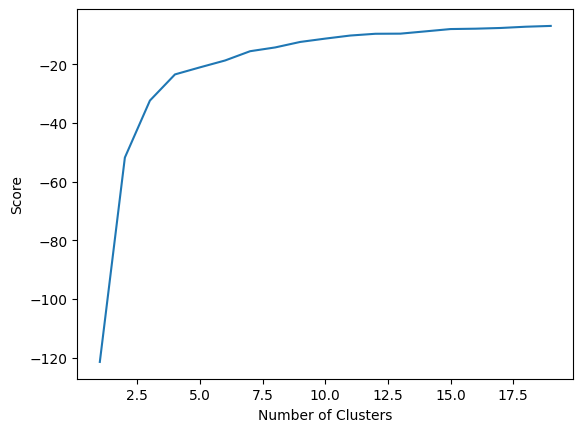

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


Nc0 = range(1,20)
kmeans0 = [KMeans(n_clusters=i, n_init='auto') for i in Nc0]
print(kmeans0)

score0 = [kmeans0[i].fit(weather_scaled0).score(weather_scaled0) for i in range(len(kmeans0))]
print(score0)

plt.plot(Nc0, score0)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

In [ ]:
kmeans0 = KMeans(n_clusters=3, max_iter=600, algorithm='lloyd', n_init='auto')
kmeans0.fit(weather_scaled0)
energy0['weather_cluster'] = kmeans0.labels_
energy0.head()

,day,energy_sum,temperatureMax,windSpeed,humidity,holiday_ind,LCLid,avg_energy,weather_cluster
0,2011-11-24,6.136,12.93,4.04,0.89,0.0,1,6.136,2
1,2011-11-25,18.945,13.03,5.02,0.79,0.0,1,18.945,2
2,2011-11-26,28.471,12.96,5.75,0.81,1.0,1,28.471,2
3,2011-11-27,24.710,13.54,5.48,0.72,1.0,1,24.710,2
4,2011-11-28,18.007,12.58,2.34,0.86,0.0,1,18.007,2


In [ ]:
# Model

In [ ]:
import numpy as np

np.random.seed(11)
dataframe = energy0.loc[:,'avg_energy']
dataset = dataframe.values
dataset = dataset.astype('float32')

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
reframed0 = series_to_supervised(dataset, 7,1)
reframed0.head()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,6.136000,18.945000,28.471001,24.710001,18.007000,18.066999,16.483999,14.010000
8,18.945000,28.471001,24.710001,18.007000,18.066999,16.483999,14.010000,29.693001
9,28.471001,24.710001,18.007000,18.066999,16.483999,14.010000,29.693001,20.579000
10,24.710001,18.007000,18.066999,16.483999,14.010000,29.693001,20.579000,23.646000
11,18.007000,18.066999,16.483999,14.010000,29.693001,20.579000,23.646000,14.513000


In [ ]:
reframed0['weather_cluster'] = energy0['weather_cluster'].values[7:]
reframed0['holiday_ind']= energy0['holiday_ind'].values[7:]

In [ ]:
reframed0 = reframed0.reindex(['weather_cluster', 'holiday_ind','var1(t-7)', 'var1(t-6)', 'var1(t-5)', 'var1(t-4)', 'var1(t-3)','var1(t-2)', 'var1(t-1)', 'var1(t)'], axis=1)
reframed0 = reframed0.values

In [ ]:
n = int(0.2*(len(energy0)))
n

165

In [ ]:
# Normalisation
scaler0 = MinMaxScaler(feature_range=(0, 1))
reframed0 = scaler0.fit_transform(reframed0)

In [ ]:
train0 = reframed0[:(len(reframed0)-n), :]
test0 = reframed0[(len(reframed0)-n):len(reframed0), :]

In [ ]:
train_X0, train_y0 = train0[:, :-1], train0[:, -1]
test_X0, test_y0 = test0[:, :-1], test0[:, -1]

In [ ]:
train_X0 = train_X0.reshape((train_X0.shape[0], 1, train_X0.shape[1]))
test_X0 = test_X0.reshape((test_X0.shape[0], 1, test_X0.shape[1]))
print(train_X0.shape, train_y0.shape, test_X0.shape, test_y0.shape)

(654, 1, 9) (654,) (165, 1, 9) (165,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.regularizers import L2

In [ ]:
# # design network
# model = Sequential()
# model.add(LSTM(50, input_shape=(train_X0.shape[1], train_X0.shape[2]), return_sequences=True))
# model.add(LSTM(50, return_sequences=True))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1))
# model.compile(loss='mae', optimizer='rmsprop')

# # fit network
# history = model.fit(train_X0, train_y0, epochs=50, batch_size=72, verbose=2, shuffle=False, validation_data=(test_X0, test_y0))

# # plot history
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()


In [ ]:
# # design network
# model = Sequential()
# model.add(LSTM(50, input_shape=(train_X0.shape[1], train_X0.shape[2]), return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(50, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu', kernel_regularizer=L2(0.01)))
# model.add(Dense(1))
# model.compile(loss='mse', optimizer='adam')

# # fit network
# history = model.fit(train_X0, train_y0, epochs=100, batch_size=32, verbose=2, shuffle=False, validation_data=(test_X0, test_y0))

# # plot history
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()

Epoch 1/100
21/21 - 6s - loss: 0.0762 - val_loss: 0.0494 - 6s/epoch - 286ms/step
Epoch 2/100
21/21 - 0s - loss: 0.0252 - val_loss: 0.0077 - 202ms/epoch - 10ms/step
Epoch 3/100
21/21 - 0s - loss: 0.0046 - val_loss: 0.0018 - 209ms/epoch - 10ms/step
Epoch 4/100
21/21 - 0s - loss: 0.0052 - val_loss: 0.0030 - 215ms/epoch - 10ms/step
Epoch 5/100
21/21 - 0s - loss: 0.0037 - val_loss: 0.0015 - 444ms/epoch - 21ms/step
Epoch 6/100
21/21 - 0s - loss: 0.0031 - val_loss: 0.0013 - 379ms/epoch - 18ms/step
Epoch 7/100
21/21 - 0s - loss: 0.0028 - val_loss: 0.0011 - 363ms/epoch - 17ms/step
Epoch 8/100
21/21 - 0s - loss: 0.0025 - val_loss: 9.1608e-04 - 361ms/epoch - 17ms/step
Epoch 9/100
21/21 - 1s - loss: 0.0024 - val_loss: 8.1255e-04 - 636ms/epoch - 30ms/step
Epoch 10/100
21/21 - 0s - loss: 0.0023 - val_loss: 8.0017e-04 - 219ms/epoch - 10ms/step
Epoch 11/100
21/21 - 0s - loss: 0.0024 - val_loss: 7.8074e-04 - 202ms/epoch - 10ms/step
Epoch 12/100
21/21 - 0s - loss: 0.0024 - val_loss: 7.5594e-04 - 180ms/e

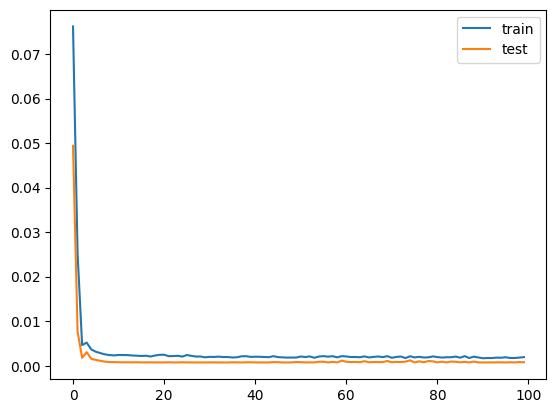

In [ ]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X0.shape[1], train_X0.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X0, train_y0, epochs=100, batch_size=32, verbose=2, shuffle=False, validation_data=(test_X0, test_y0))

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

6/6 [==============================] - 1s 3ms/step
(165, 1) (165,)
(165,) (165,)
Test MAE: 0.014


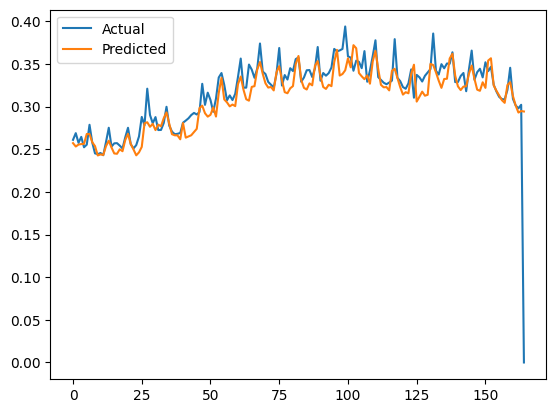

In [ ]:
# make predictions on test data
from sklearn.metrics import mean_absolute_error


y_pred = model.predict(test_X0)
print(y_pred.shape, test_y0.shape)
y_pred = y_pred.reshape(-1)
test_y0 = test_y0.reshape(-1)
print(y_pred.shape, test_y0.shape)
# calculate MAE
mae = mean_absolute_error(test_y0, y_pred)
print('Test MAE: %.3f' % mae)

# plot actual vs predicted values
plt.plot(test_y0)
plt.plot(y_pred)
plt.legend(['Actual', 'Predicted'])
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

# calculate MSE
mse = mean_squared_error(test_y0, y_pred)
print('Test MSE: %.3f' % mse)

rmse = np.sqrt(mse)
print('Test RMSE: %.3f' % rmse)

Test MSE: 0.001
Test RMSE: 0.028


In [ ]:
from sklearn.metrics import r2_score
acc = r2_score(test_y0, y_pred)
print(acc)

0.5911797635746118


Cross Validation

In [ ]:
df_temp0 = pd.DataFrame(reframed0, columns = ['weather_cluster', 'holiday_ind','var1(t-7)', 'var1(t-6)', 'var1(t-5)', 'var1(t-4)', 'var1(t-3)','var1(t-2)', 'var1(t-1)', 'var1(t)'])
df_temp0['date'] = energy0['day']
df_temp0 = df_temp0[['date', 'weather_cluster', 'holiday_ind','var1(t-7)', 'var1(t-6)', 'var1(t-5)', 'var1(t-4)', 'var1(t-3)','var1(t-2)', 'var1(t-1)', 'var1(t)']]
df_temp0

,date,weather_cluster,holiday_ind,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
0,2011-11-24,1.0,0.000000,0.000000,0.252136,0.502748,0.403803,0.227459,0.229037,0.187391,0.291355
1,2011-11-25,1.0,0.000000,0.310627,0.502748,0.403803,0.227459,0.229037,0.187391,0.122305,0.624479
2,2011-11-26,1.0,0.000623,0.541638,0.403803,0.227459,0.229037,0.187391,0.122305,0.534897,0.430888
3,2011-11-27,1.0,0.000623,0.450432,0.227459,0.229037,0.187391,0.122305,0.534897,0.295124,0.496034
4,2011-11-28,1.0,0.000000,0.287880,0.229037,0.187391,0.122305,0.534897,0.295124,0.375811,0.302039
...,...,...,...,...,...,...,...,...,...,...,...
814,2014-02-17,0.0,0.000000,0.230057,0.154835,0.147018,0.143809,0.143357,0.157104,0.189310,0.309081
815,2014-02-18,0.0,0.000000,0.220935,0.147018,0.143809,0.143357,0.157104,0.189310,0.144260,0.301309
816,2014-02-19,0.0,0.000000,0.213730,0.143809,0.143357,0.157104,0.189310,0.144260,0.134633,0.297889
817,2014-02-20,0.0,0.000000,0.210772,0.143357,0.157104,0.189310,0.144260,0.134633,0.130397,0.302068


In [ ]:
X = df_temp0.iloc[:,:-1]
y = df_temp0.iloc[:,-1]

In [ ]:
from sklearn.model_selection import GroupKFold

# Assuming you have time series data X and target variable y, as well as a groups variable defining the groups
# For example, groups could be the year or month of each data point

# Define the number of folds and the groups for each data point
n_splits = 5
scores = []
groups = X['date']

# Define the grouped k-fold cross-validation object
group_kfold = GroupKFold(n_splits=n_splits)

In [ ]:
X = X.drop(['date'], axis=1)
X

,weather_cluster,holiday_ind,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
0,1.0,0.000000,0.000000,0.252136,0.502748,0.403803,0.227459,0.229037,0.187391
1,1.0,0.000000,0.310627,0.502748,0.403803,0.227459,0.229037,0.187391,0.122305
2,1.0,0.000623,0.541638,0.403803,0.227459,0.229037,0.187391,0.122305,0.534897
3,1.0,0.000623,0.450432,0.227459,0.229037,0.187391,0.122305,0.534897,0.295124
4,1.0,0.000000,0.287880,0.229037,0.187391,0.122305,0.534897,0.295124,0.375811
...,...,...,...,...,...,...,...,...,...
814,0.0,0.000000,0.230057,0.154835,0.147018,0.143809,0.143357,0.157104,0.189310
815,0.0,0.000000,0.220935,0.147018,0.143809,0.143357,0.157104,0.189310,0.144260
816,0.0,0.000000,0.213730,0.143809,0.143357,0.157104,0.189310,0.144260,0.134633
817,0.0,0.000000,0.210772,0.143357,0.157104,0.189310,0.144260,0.134633,0.130397


In [ ]:
# Loop through each fold and split the data into training and testing sets
for train_index, test_index in group_kfold.split(X, y, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Converting to nparray
    X_train = np.asarray(X_train).astype(np.float32)
    X_test = np.asarray(X_test).astype(np.float32)
    y_train = np.asarray(y_train).astype(np.float32)
    y_test = np.asarray(y_test).astype(np.float32)

    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    
    # Train and evaluate the model on the training and testing sets
    model.fit(X_train, y_train)
    score = model.evaluate(X_test, y_test)
    
    # Store the performance score for this fold
    scores.append(score)

# Compute the average performance score over all the folds
avg_score = sum(scores) / n_splits

6/6 [==============================] - 0s 3ms/step - loss: 9.0001e-04


In [ ]:
model.metrics_names

['loss']

In [ ]:
scores

[0.002795805688947439,
 0.0017326484667137265,
 0.0007619628449901938,
 0.0012249108403921127,
 0.0009000097634270787]

In [ ]:
avg_score

0.0014830675208941102

In [ ]:
# Interpretation:
# We took 'loss' as the evaluation metric while training our model, so this cross validation score basically means the how well the model is performing on data that it hasn't seen during training. 
# Here, the less validation score indicates better performance of the model. 
# Higher validation score would mean overfitting on the training data.

Grid Search

In [ ]:
def create_model(units=50, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units, input_shape=(train_X0.shape[1], train_X0.shape[2]), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    return model

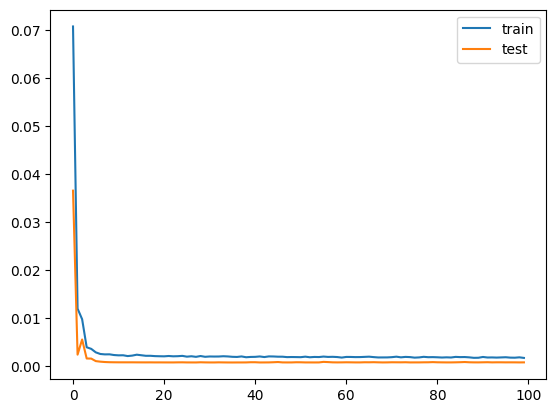

In [ ]:
# MODEL update after Grid Search (units = 128,64 and verbose = 0)

# design network
model = Sequential()
model.add(LSTM(128, input_shape=(train_X0.shape[1], train_X0.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X0, train_y0, epochs=100, batch_size=32, verbose=0, shuffle=False, validation_data=(test_X0, test_y0))

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

6/6 [==============================] - 1s 3ms/step
(165, 1) (165,)
(165,) (165,)
Test MAE: 0.012


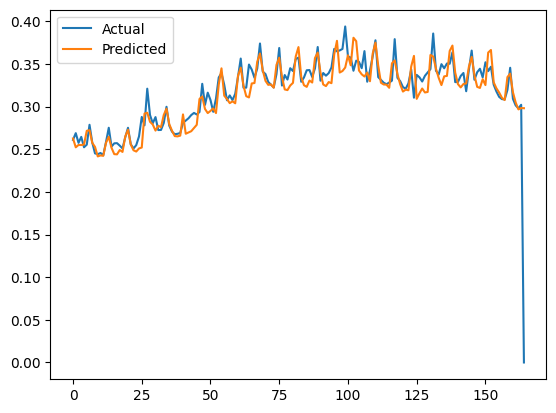

In [ ]:
# make predictions on test data
from sklearn.metrics import mean_absolute_error


y_pred = model.predict(test_X0)
print(y_pred.shape, test_y0.shape)
y_pred = y_pred.reshape(-1)
test_y0 = test_y0.reshape(-1)
print(y_pred.shape, test_y0.shape)
# calculate MAE
mae = mean_absolute_error(test_y0, y_pred)
print('Test MAE: %.3f' % mae)

# plot actual vs predicted values
plt.plot(test_y0)
plt.plot(y_pred)
plt.legend(['Actual', 'Predicted'])
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

# calculate MSE
mse = mean_squared_error(test_y0, y_pred)
print('Test MSE: %.3f' % mse)

rmse = np.sqrt(mse)
print('Test RMSE: %.3f' % rmse)

Test MSE: 0.001
Test RMSE: 0.027


In [ ]:
from sklearn.metrics import r2_score
acc = r2_score(test_y0, y_pred)
print(acc)

0.6075909244546687
